<a href="https://colab.research.google.com/github/hames08/PROGCOM-B/blob/main/problema_de_carrera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

===== RESULTADOS =====
Resistencia equivalente total: 221.196 Ω
Corriente total: 0.0543 A
Corriente rama superior: 0.0324 A
Corriente rama inferior: 0.0218 A
Voltaje en (R2||R3): 3.8919 V
Potencias (W): [0.105, 0.076, 0.05, 0.158, 0.105, 0.157]


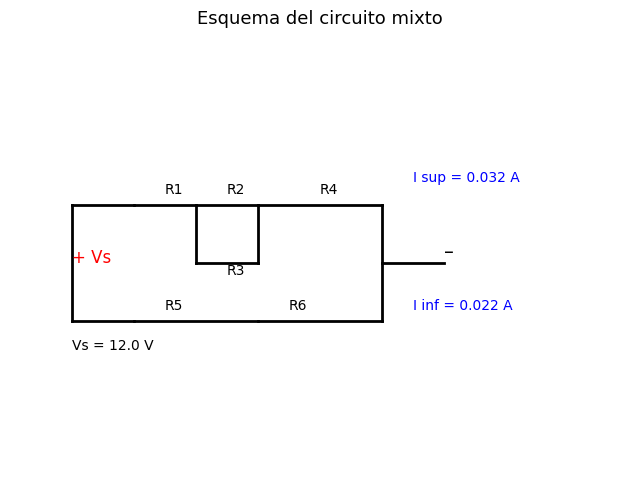

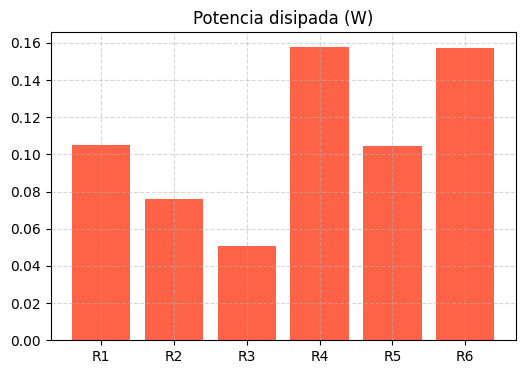

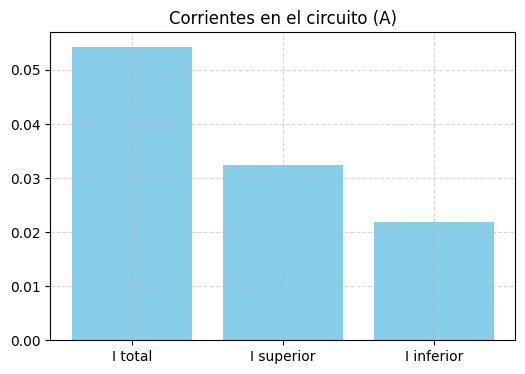

In [5]:
#Simulador de circuito mixto
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

#Función para calcular resistencias en paralelo
def paralelo(*resistencias):
    return 1 / sum(1/x for x in resistencias)

#Función principal del circuito
def circuitoMixto(voltaje, resistencia1, resistencia2, resistencia3, resistencia4, resistencia5, resistencia6):
    resistenciaParalela = paralelo(resistencia2, resistencia3)
    resistenciaSuperior = resistencia1 + resistenciaParalela + resistencia4
    resistenciaInferior = resistencia5 + resistencia6
    resistenciaEquivalente = paralelo(resistenciaSuperior, resistenciaInferior)
    corrienteTotal = voltaje / resistenciaEquivalente
    corrienteSuperior = voltaje / resistenciaSuperior
    corrienteInferior = voltaje / resistenciaInferior
    voltajeParalelo = corrienteSuperior * resistenciaParalela
    corrienteR2 = voltajeParalelo / resistencia2
    corrienteR3 = voltajeParalelo / resistencia3

    potencias = [
        (corrienteSuperior**2)*resistencia1,
        (corrienteR2**2)*resistencia2,
        (corrienteR3**2)*resistencia3,
        (corrienteSuperior**2)*resistencia4,
        (corrienteInferior**2)*resistencia5,
        (corrienteInferior**2)*resistencia6
    ]

    # Mostrar resultados
    clear_output(wait=True)
    print("RESULTADOS")
    print(f"Resistencia equivalente total: {resistenciaEquivalente:.3f} Ω")
    print(f"Corriente total: {corrienteTotal:.4f} A")
    print(f"Corriente rama superior: {corrienteSuperior:.4f} A")
    print(f"Corriente rama inferior: {corrienteInferior:.4f} A")
    print(f"Voltaje en (R2||R3): {voltajeParalelo:.4f} V")
    print("Potencias (W):", [round(p,3) for p in potencias])

    # Esquema visual del circuito
    figura, eje = plt.subplots(figsize=(8,6))
    eje.set_xlim(0,10)
    eje.set_ylim(0,8)
    eje.axis("off")

    # Fuente
    eje.text(1,4,"+ Vs", fontsize=12, color="red")
    eje.plot([1,1],[3,5],"k",lw=2)
    eje.plot([1,2],[5,5],"k",lw=2)

    # Rama superior
    eje.text(2.5,5.2,"R1",fontsize=10)
    eje.plot([2,3],[5,5],"k",lw=2)
    eje.text(3.5,5.2,"R2",fontsize=10)
    eje.plot([3,4],[5,5],"k",lw=2)
    eje.text(3.5,3.8,"R3",fontsize=10)
    eje.plot([3,4],[4,4],"k",lw=2)
    eje.plot([3,3],[4,5],"k",lw=2)
    eje.plot([4,4],[4,5],"k",lw=2)
    eje.text(5,5.2,"R4",fontsize=10)
    eje.plot([4,6],[5,5],"k",lw=2)

    # Rama inferior
    eje.plot([1,2],[3,3],"k",lw=2)
    eje.text(2.5,3.2,"R5",fontsize=10)
    eje.plot([2,4],[3,3],"k",lw=2)
    eje.text(4.5,3.2,"R6",fontsize=10)
    eje.plot([4,6],[3,3],"k",lw=2)

    # Unión final
    eje.plot([6,6],[3,5],"k",lw=2)
    eje.plot([6,7],[4,4],"k",lw=2)
    eje.text(7,4.1,"–",fontsize=14)

    eje.text(1,2.5,f"Vs = {voltaje:.1f} V",fontsize=10)
    eje.text(6.5,5.4,f"I sup = {corrienteSuperior:.3f} A",fontsize=10,color="blue")
    eje.text(6.5,3.2,f"I inf = {corrienteInferior:.3f} A",fontsize=10,color="blue")

    plt.title("Esquema del circuito mixto", fontsize=13)
    plt.show()

    # Gráfica 1: Potencias
    plt.figure(figsize=(6,4))
    etiquetas = ["R1","R2","R3","R4","R5","R6"]
    plt.bar(etiquetas, potencias, color="tomato")
    plt.title("Potencia disipada (W)")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

    # Gráfica 2: Corrientes
    plt.figure(figsize=(6,4))
    plt.bar(["I total","I superior","I inferior"], [corrienteTotal, corrienteSuperior, corrienteInferior], color="skyblue")
    plt.title("Corrientes en el circuito (A)")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()


# Widgets de entrada
voltaje = widgets.FloatSlider(value=12, min=1, max=50, step=1, description='Voltaje (V):')
resistencia1 = widgets.FloatSlider(value=100, min=10, max=1000, step=10, description='R1 (Ω):')
resistencia2 = widgets.FloatSlider(value=200, min=10, max=1000, step=10, description='R2 (Ω):')
resistencia3 = widgets.FloatSlider(value=300, min=10, max=1000, step=10, description='R3 (Ω):')
resistencia4 = widgets.FloatSlider(value=150, min=10, max=1000, step=10, description='R4 (Ω):')
resistencia5 = widgets.FloatSlider(value=220, min=10, max=1000, step=10, description='R5 (Ω):')
resistencia6 = widgets.FloatSlider(value=330, min=10, max=1000, step=10, description='R6 (Ω):')

boton = widgets.Button(description="Analizar circuito", button_style="success")

def actualizar(boton):
    circuitoMixto(
        voltaje.value,
        resistencia1.value,
        resistencia2.value,
        resistencia3.value,
        resistencia4.value,
        resistencia5.value,
        resistencia6.value
    )

boton.on_click(actualizar)

display(voltaje, resistencia1, resistencia2, resistencia3, resistencia4, resistencia5, resistencia6, boton)
